In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv(r"C:\\Users\HP\Downloads\application_record.csv.zip")
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
df.isnull().sum()/(len(df)*100)

ID                     0.00000
CODE_GENDER            0.00000
FLAG_OWN_CAR           0.00000
FLAG_OWN_REALTY        0.00000
CNT_CHILDREN           0.00000
AMT_INCOME_TOTAL       0.00000
NAME_INCOME_TYPE       0.00000
NAME_EDUCATION_TYPE    0.00000
NAME_FAMILY_STATUS     0.00000
NAME_HOUSING_TYPE      0.00000
DAYS_BIRTH             0.00000
DAYS_EMPLOYED          0.00000
FLAG_MOBIL             0.00000
FLAG_WORK_PHONE        0.00000
FLAG_PHONE             0.00000
FLAG_EMAIL             0.00000
OCCUPATION_TYPE        0.00306
CNT_FAM_MEMBERS        0.00000
dtype: float64

In [6]:
label=LabelEncoder()

In [7]:
df["OCCUPATION_TYPE"]=label.fit_transform(df["OCCUPATION_TYPE"])

In [8]:
df=df.fillna(df.median())

In [9]:
col=df.shape[1]


In [10]:
scale=MinMaxScaler()

<AxesSubplot:>

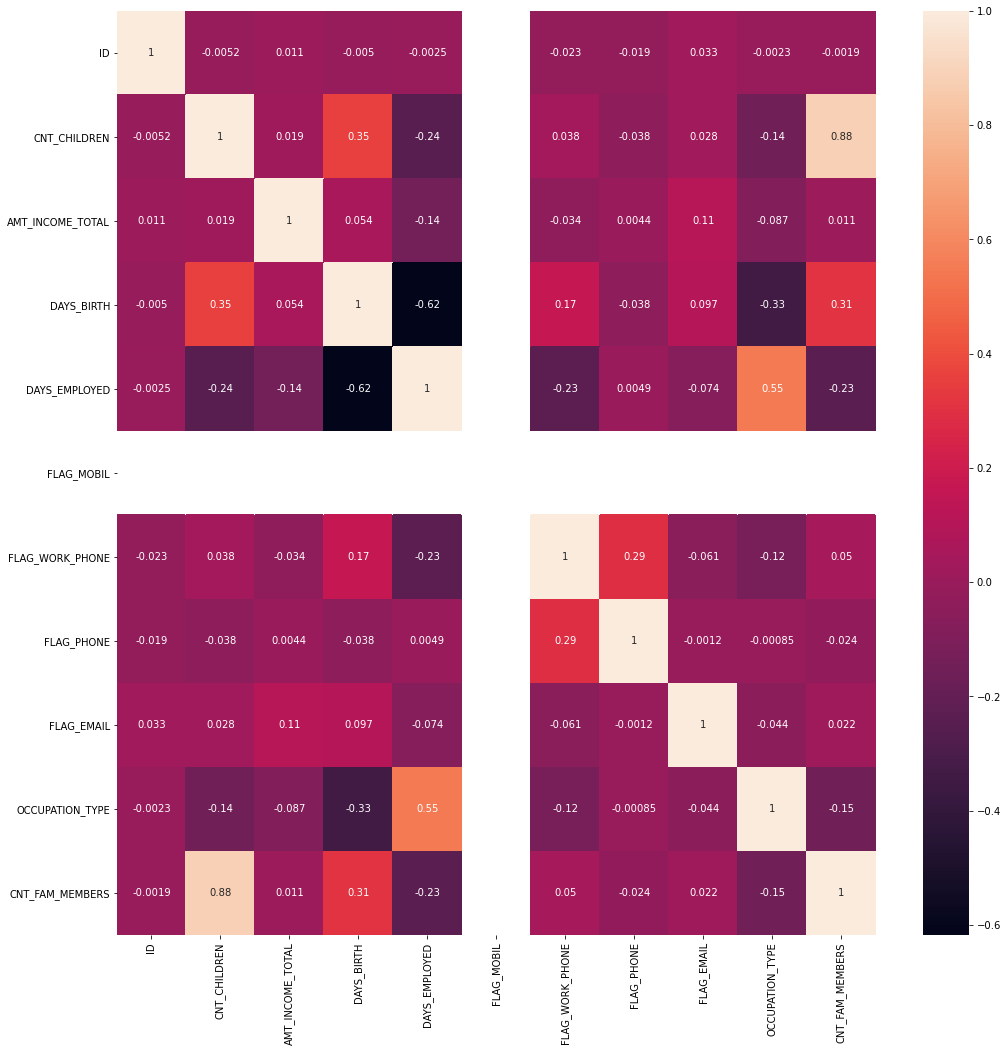

In [11]:
plt.subplots(figsize=(17,17))
sns.heatmap(df.corr(),annot=True)

In [12]:
credit=pd.read_csv(r"C:\\Users\HP\Downloads\credit_record.csv.zip")
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [13]:
data=df.merge(credit,how='left')

In [14]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,18,2.0,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,18,2.0,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,18,2.0,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,18,2.0,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,18,2.0,-4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,18,1.0,NaN,NaN
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,8,1.0,NaN,NaN
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,14,1.0,NaN,NaN
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,18,2.0,NaN,NaN


In [15]:
data.isnull().sum()/len(data)

ID                     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
FLAG_MOBIL             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        0.000000
CNT_FAM_MEMBERS        0.000000
MONTHS_BALANCE         0.340816
STATUS                 0.340816
dtype: float64

In [16]:
data['MONTHS_BALANCE']=data['MONTHS_BALANCE'].fillna(data['MONTHS_BALANCE'].median())


In [17]:
data['STATUS']=label.fit_transform(data['STATUS'])

In [18]:
data['STATUS']=data['STATUS'].fillna(data['STATUS'].median())

In [19]:
data['STATUS'].replace({'X':-1,'C':-2},inplace=True)


In [20]:
good_bad=[]
for index,row in data.iterrows():
    
    if row['STATUS'] <=1 :
        
        good_bad.append(1)
    else:
        good_bad.append(0)
data.insert(20,"good/bad",good_bad)

In [21]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,good/bad
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,18,2.0,0.0,6,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,18,2.0,-1.0,6,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,18,2.0,-2.0,6,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,18,2.0,-3.0,6,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,18,2.0,-4.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,18,1.0,-17.0,8,0
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-3007,1,0,0,0,8,1.0,-17.0,8,0
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,...,-372,1,1,0,0,14,1.0,-17.0,8,0
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,18,2.0,-17.0,8,0


In [22]:
(data['STATUS']==0).sum()

290654

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
data['FLAG_OWN_CAR']=label.fit_transform(data['FLAG_OWN_CAR'])
data['CODE_GENDER']=label.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_REALTY']=label.fit_transform(data['FLAG_OWN_REALTY'])
data['NAME_INCOME_TYPE']=label.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_EDUCATION_TYPE']=label.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_FAMILY_STATUS']=label.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_HOUSING_TYPE']=label.fit_transform(data['NAME_HOUSING_TYPE'])

<AxesSubplot:>

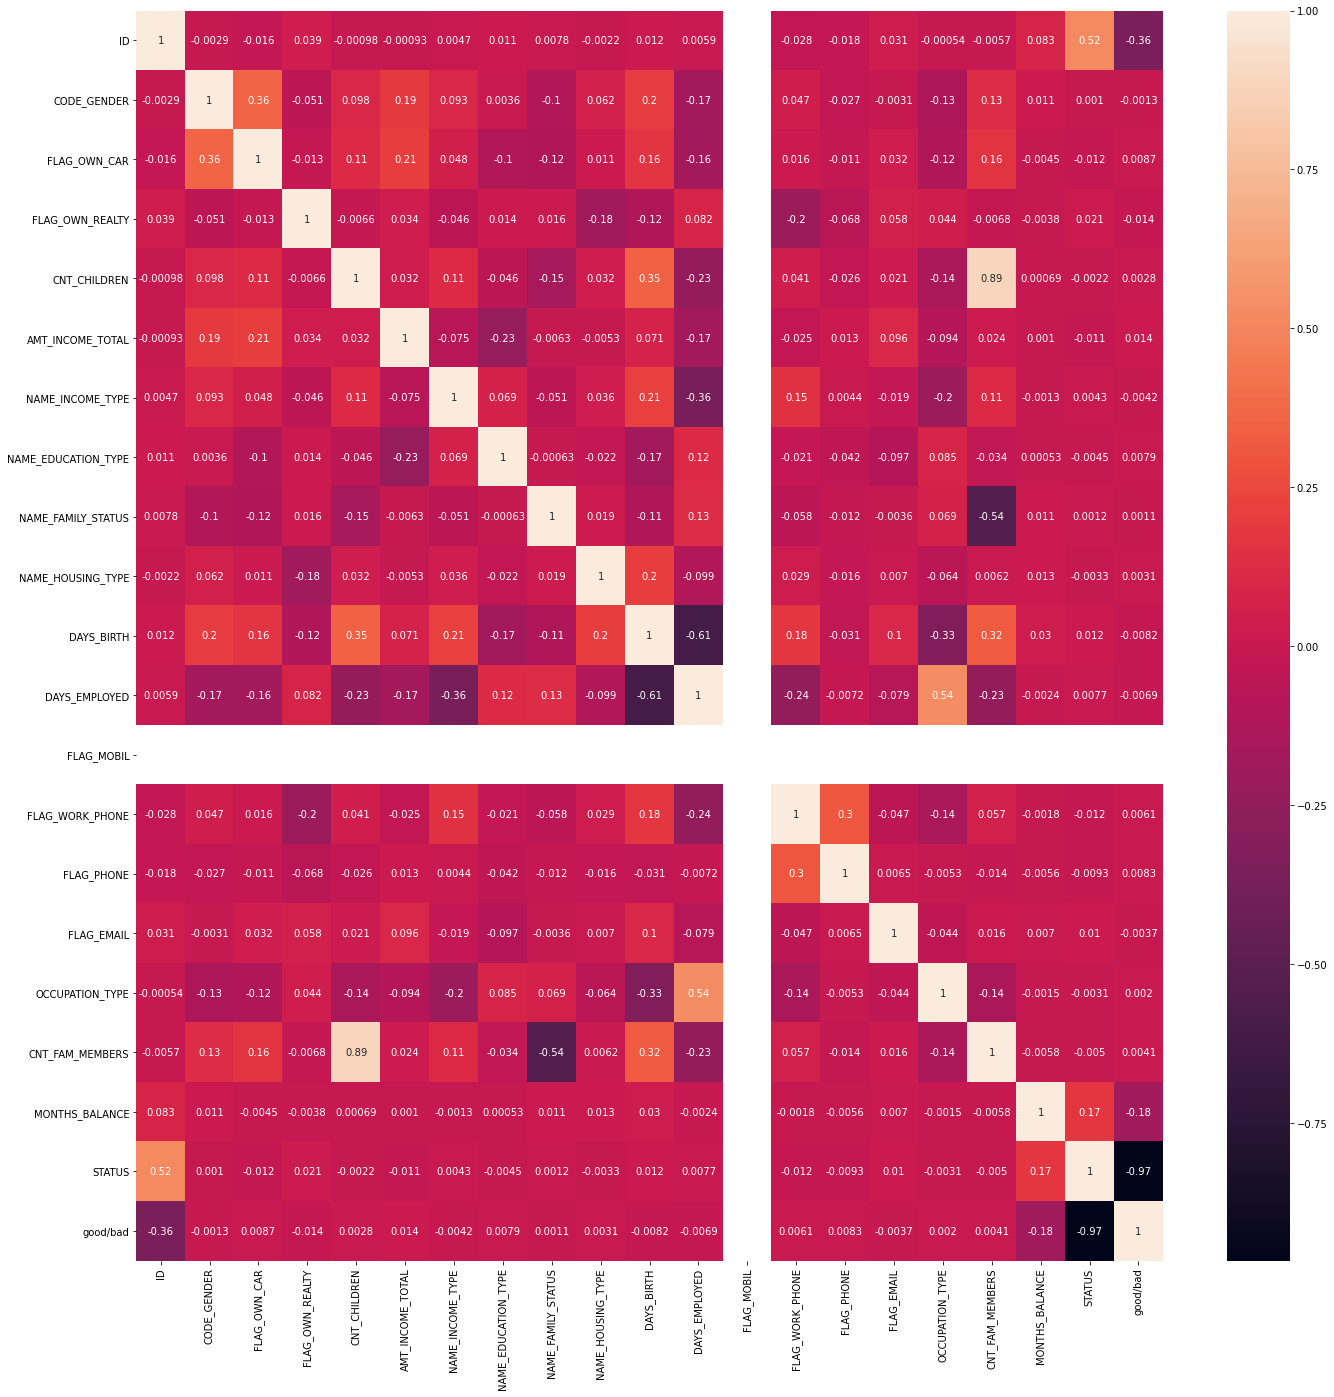

In [25]:
plt.subplots(figsize=(23,23))
sns.heatmap(data.corr(),annot=True)

In [26]:
x=data[['FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS'
       ,'DAYS_BIRTH','DAYS_EMPLOYED','FLAG_WORK_PHONE','FLAG_PHONE','OCCUPATION_TYPE','CNT_FAM_MEMBERS']]
y=data[['good/bad']]

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [65]:
pca=PCA(n_components=1,svd_solver='full')
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train=pca.fit_transform(x_train)
y_train=pca.fit_transform(y_train)


In [84]:
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [85]:
x_train

array([[0.29751701, 0.2879561 , 0.57727871, ..., 0.49334596, 0.6534054 ,
        0.44486372],
       [0.11596437, 0.32143296, 0.41030147, ..., 0.75875216, 0.71072418,
        0.56134538],
       [0.44678305, 0.27664113, 0.49666938, ..., 0.56215862, 0.48003071,
        0.38314062],
       ...,
       [0.6574128 , 0.67092235, 0.44865338, ..., 0.52547784, 0.39875919,
        0.73936041],
       [0.54371747, 0.72710055, 0.37783488, ..., 0.40671943, 0.24501992,
        0.6827559 ],
       [0.67472955, 0.49164521, 0.56773178, ..., 0.39157555, 0.55831416,
        0.30722755]])

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [87]:
x_train, y_train = make_classification(n_samples=1000, n_features=13,n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

In [95]:
clf = RandomForestClassifier(max_depth=2, random_state=10)

In [96]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=10)

In [97]:
predict=clf.predict(x_test)

In [103]:
from sklearn.metrics import confusion_matrix, classification_report

In [104]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.26      0.41    235963

    accuracy                           0.26    235963
   macro avg       0.50      0.13      0.20    235963
weighted avg       1.00      0.26      0.41    235963



C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
from sklearn import tree

In [107]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf.fit(x_train, y_train)

In [108]:
predict2=clf2.predict(x_test)

In [109]:
print(classification_report(predict2,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.26      0.41    235963

    accuracy                           0.26    235963
   macro avg       0.50      0.13      0.20    235963
weighted avg       1.00      0.26      0.41    235963



C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
